# Experiment 1: Static Skill Scenario

This notebook simulates a scenario where player skills are fixed ("static") throughout the entire tournament. The goal is to observe how well the Elo rating system can converge to the players' true, unchanging skill levels over a series of games.

We will:
1. **Initialize Players**: Create 50 players with randomly assigned but fixed `true_skill` values.
2. **Configure the Simulation**: Set up an `Elo` system and define a `random_pairing` strategy.
3. **Run the Simulation**: Use the `Simulation` class from `src` to run a set number of games.
4. **Analyze Results**: Visualize the correlation between the players' Elo `rating` and their `true_skill` over time to see how the system learns.

## 1. Setup and Imports

First, we'll set up the Python path to ensure we can import our custom modules from the `src` directory. Then, we'll import all the necessary components.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add the project root to the Python path to allow for module imports
module_path = os.path.abspath(os.path.join('..', "src"))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import our custom modules
from elo import Elo
from scenarios import random_pairing
from simulation import Simulation
from visualization import plot_correlation_over_time

## 2. Simulation Configuration

Here, we define the core parameters for our simulation experiment.

In [ ]:
NUM_PLAYERS = 25
NUM_GAMES = 100
K_FACTOR = 32
INITIAL_RATING = 1000
SKILL_STD_DEV = 400 # Standard deviation of true skill among players

# For reproducibility
np.random.seed(42)

## 3. Player and System Initialization

We'll now create the player roster and instantiate the Elo rating system.

In [3]:
# Create the initial player DataFrame
player_ids = [f"player_{i}" for i in range(NUM_PLAYERS)]
true_skills = np.random.normal(loc=INITIAL_RATING, scale=SKILL_STD_DEV, size=NUM_PLAYERS)

players_df = pd.DataFrame({
    "player_id": player_ids,
    "true_skill": true_skills
})

print("Initial Player Roster:")
display(players_df.head())

Initial Player Roster:


,player_id,true_skill
0,player_0,1198.685661
1,player_1,944.694280
2,player_2,1259.075415
3,player_3,1609.211943
4,player_4,906.338650


In [4]:
# Initialize the Elo rating system
elo_system = Elo(k_factor=K_FACTOR, initial_rating=INITIAL_RATING)

# For this scenario, skills are static, so we don't need a skill_update_strategy.
skill_update_strategy = None

## 4. Running the Simulation

With all components ready, we instantiate the `Simulation` class and run it. The `Simulation` object will orchestrate the games, pairings, and rating updates automatically.

In [ ]:
# Create the simulation instance
simulation = Simulation(
    players_df=players_df,
    rating_system=elo_system,
    pairing_strategy=random_pairing,
    skill_update_strategy=skill_update_strategy,
    log_every_n_games=1 # Log history every game
)

# Run the simulation
final_player_state = simulation.run(num_games=NUM_GAMES)

Simulating Games: 100%|██████████| 500/500 [00:01<00:00, 308.87it/s]


## 5. Analyzing the Results

The simulation is complete. The `simulation` object now contains `history_df`, a DataFrame with a snapshot of all player skills and ratings at regular intervals. We can use our `plot_correlation_over_time` function to visualize how well the Elo ratings learned to represent the true skill.

Simulation History Snippet:


,player_id,true_skill,rating,game_num
0,player_0,1198.685661,1000.0,0
1,player_1,944.694280,1000.0,0
2,player_2,1259.075415,1000.0,0
3,player_3,1609.211943,1000.0,0
4,player_4,906.338650,1000.0,0


/home/azazelle/Dev/ELO Analysis/ELOAnalyis/src/metrics.py:77: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, _ = stats.pearsonr(y_true_arr, y_pred_arr)
/home/azazelle/Dev/ELO Analysis/ELOAnalyis/src/metrics.py:78: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, _ = stats.spearmanr(y_true_arr, y_pred_arr)
/home/azazelle/Dev/ELO Analysis/ELOAnalyis/.venv/lib/python3.12/site-packages/scipy/stats/_correlation.py:37: RuntimeWarning: invalid value encountered in scalar divide
  statistic = 1 - n * num / den
/home/azazelle/Dev/ELO Analysis/ELOAnalyis/.venv/lib/python3.12/site-packages/scipy/stats/_correlation.py:63: RuntimeWarning: invalid value encountered in scalar divide
  tau2 = (an - 2*bn + cn**2) / dn**2


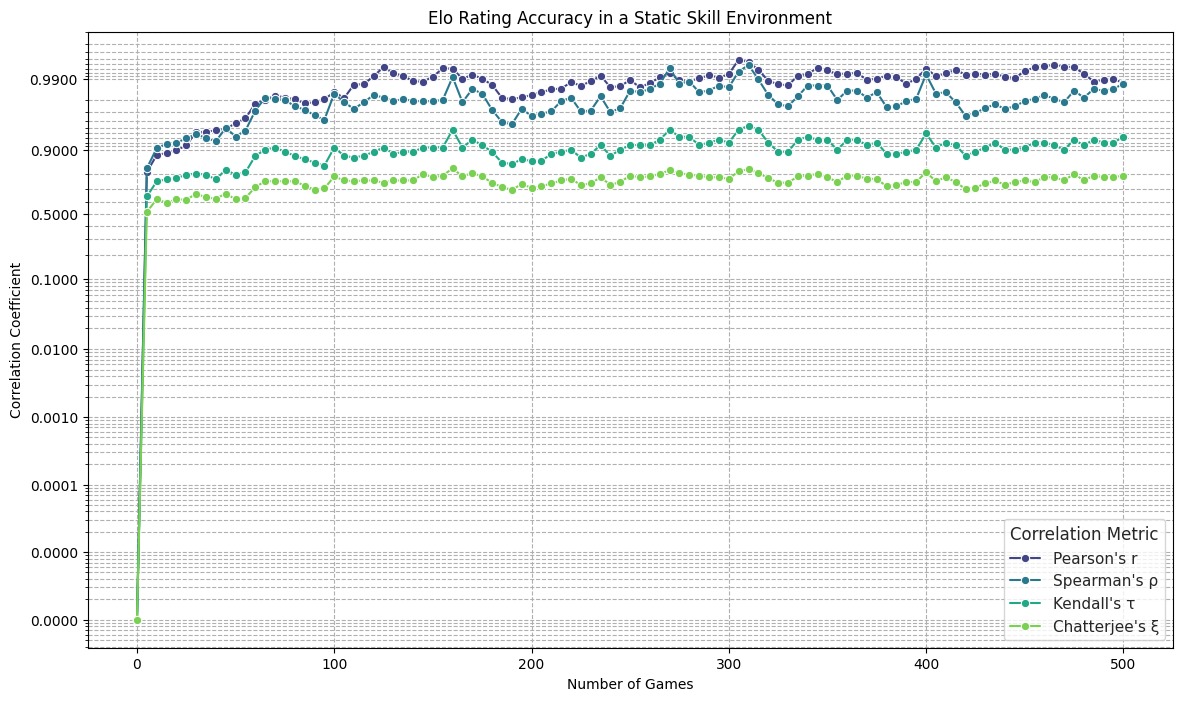

In [6]:
print("Simulation History Snippet:")
display(simulation.history_df.head())

fig, ax = plt.subplots(figsize=(14, 8))

plot_correlation_over_time(
    history_df=simulation.history_df,
    rating_col='rating',
    skill_col='true_skill',
    title='Elo Rating Accuracy in a Static Skill Environment',
    ax=ax
)

plt.show()

### Final State Analysis

Let's look at the final state of the players. We expect to see a strong positive correlation between `true_skill` and the final `rating`.

In [7]:
# Re-add player_id for clarity from the final_player_state index
final_player_state_with_id = final_player_state.set_index('player_id', drop=False)

print("Final Player Ratings vs. True Skill:")
display(final_player_state_with_id[['player_id', 'true_skill', 'rating']].sort_values(by='rating', ascending=False).head(10))

# Scatter plot of final ratings vs. true skill
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(final_player_state_with_id['true_skill'], final_player_state_with_id['rating'], alpha=0.7)
ax.set_title('Final Rating vs. True Skill')
ax.set_xlabel('True Skill')
ax.set_ylabel('Final Elo Rating')
ax.grid(True)
ax.plot([min(true_skills), max(true_skills)], [min(true_skills), max(true_skills)], 'r--', label='Ideal 1:1 Line')
ax.legend()
plt.show()

KeyError: "None of ['player_id'] are in the columns"

### Conclusion

As shown in the line chart, all correlation metrics rapidly increase and approach 1.0, indicating that the Elo system is successfully learning the underlying skill hierarchy of the players. The final scatter plot confirms this, showing a tight, linear relationship between the players' true skills and their final Elo ratings.

This baseline experiment confirms the validity of our simulation setup and the effectiveness of the Elo system in a simple, stable environment.